In [1]:
#Import Libraries
import ROOT
from ROOT import *
import os,sys

import setup.plotsetup.plot_settings as plotsetting #import plotsetting from setup/plotsetup
import setup.plotsetup.plotmaker as pset            #import plotsetting from setup/plotsetup
import json

Welcome to JupyROOT 6.26/02


In [2]:
## USER DEFINED
LocalTest=True
runOnSkimmedSample=False
CondorJobName ="VLL2018_1L2JAnalysisWJetsEstimation_Sep13_v0"
jsonfilepath="./external/InputFiles/"+CondorJobName+"/"
bkgbundle =["HTbinnedWJets","QCD_MuEnriched","SingleTop","TTBar","DYJetsToLL","WW","WZ","ZZ","SingleMuon"]
YEAR = 2018

In [3]:
## TEST LOCALLY ON A VARIABLE
plotname   ="dijetmass"+"_l2j_base_mjj;1"
XaxisLabel = "Leading Jet M_{T}"
BinWidth   = 25

In [4]:
## CREATE ALIAS LABEL
bkgname={"HTbinnedWJets":"wjets",
         "QCD_MuEnriched":"QCD",
         "SingleTop":"ST",
         "TTBar":"ttjets",                 ## These are aliases Name
         "DYJetsToLL":"zjets",             ## These Names will be shown in Legend
         "WW":"WW",                        ## HTbinnedWJets will be named as wjets in Legend
         "WZ":"WZ",
         "ZZ":"ZZ",
         "SingleMuon":"data"}



In [5]:
## CMS LEVEL PLOT SETTINGS
plotsetting.PlotRatioPad=True
plotsetting.year=YEAR
plotsetting.publicationStyle=False
plotsetting.WorkInProgress=True

In [6]:
#IMPORT ROOTPLOTMAKER JSON FILE

with open('./inputs/rootplotmakerConfig.json','r') as infile:
    jsonfile = json.load(infile)
#----------------------------------------------------------  

*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
{'SingleMuon': ['data', 32796417.0, 1, <cppyy.gbl.TH1F object at 0x8cb5450>], 'QCD_MuEnriched': ['QCD', 21293409.785, 400, <cppyy.gbl.TH1F object at 0x87fe6a0>], 'HTbinnedWJets': ['wjets', 12096928.185, 921, <cppyy.gbl.TH1F object at 0x871c2f0>], 'TTBar': ['ttjets', 4313596.261, 422, <cppyy.gbl.TH1F object at 0x8cb8660>], 'DYJetsToLL': ['zjets', 3598182.645, 623, <cppyy.gbl.TH1F object at 0x8d1aa80>], 'SingleTop': ['ST', 766672.435, 423, <cppyy.gbl.TH1F object at 0x8d85080>], 'WW': ['WW', 273578.667, 412, <cppyy.gbl.TH1F object at 0x8dd20a0>], 'WZ': ['WZ', 72499.553, 591, <cppyy.gbl.TH1F object at 0x8d98010>], 'ZZ': ['ZZ', 9195.586, 593, <cppyy.gbl.TH1F object at 0x8d7d380>]}


Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_base_mjj;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_base_mjj;1.eps has been created


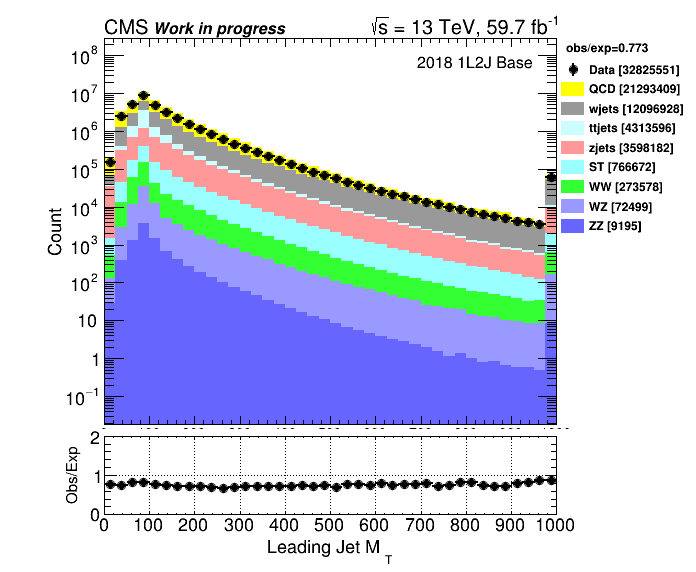

In [7]:
# LOCAL TEST
if(LocalTest==True):
    #check one sample group histo using CheckGroupHisto function
    #defined in setup/plotsetup/plotmaker.py package
    #pset.CheckGroupHisto(2018,bkgbundle,bkgname,CondorJobName,jsonfilepath,jsonfile,plotname)

    #Make a histogram directory
    HistoDict=pset.GetGroupHistoDict(runOnSkimmedSample,YEAR,bkgbundle,bkgname,CondorJobName,jsonfilepath,jsonfile,plotname)
    HistoDict=pset.SortDict(HistoDict,True) #Sorting based on yield[Descending, Flag=False ascending order]

    print(HistoDict)
    
    #Plotting: MC stacked and Data Overlaid
    canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(HistoDict,plotname,XaxisLabel,BinWidth,False,"","")
    canvas.Draw()


## WJets Estimation Starts

### ABCD method

- **Signal Region:** Region A

- **Control Region:** Region B, Region C, Region D

### **Description**

**WJets CR:** (mtlep0>50)&&(mtlep0<150) && nbjet==0 && (drjet01<1.5)

- **Region A:** WJetsCRSelection + dijetMass>50 && (mtlep0>50)&&(mtlep0<100)

- **Region B:** WJetsCRSelection + dijetMass<50 && (mtlep0>50)&&(mtlep0<100)

- **Region C:** WJetsCRSelection + dijetMass>50 && (mtlep0>100)&&(mtlep0<150)

- **Region D:** WJetsCRSelection + dijetMass<50 && (mtlep0>100)&&(mtlep0<150);

We want to predict No of Wjet events in Region A(Signal Region), using the wjet yield taken from Region B, Region C, Region D

In our control region, we calculate no of wjet events in the following way,

>$$ N_{i}^{wjets}= N_{i}^{Data} - N_{i}^{otherBkg}, i= B,C,D $$

> $${N}_{A}^{wjets} = \frac{N_{C}^{wjets}}{N_{D}^{wjets}}*N_{B}^{wjets}$$

Let's get histogram dictionary in each channel Region

In [8]:
#xvariable = "dijetmass"
#pname = xvariable+"_l2j_regA;1"

In [9]:
def GetRegionHistoDictSorted(region,var):
    pname = var+"_l2j_"+region+";1"
    histodict= pset.GetGroupHistoDict(runOnSkimmedSample,YEAR,bkgbundle,bkgname,CondorJobName,jsonfilepath,jsonfile,pname)
    histodict= pset.SortDict(histodict,True)
    return histodict

In [10]:
Region_A= GetRegionHistoDictSorted("regA","dijetmass")
Region_B= GetRegionHistoDictSorted("regB","dijetmass")
Region_C= GetRegionHistoDictSorted("regC","dijetmass")
Region_D= GetRegionHistoDictSorted("regD","dijetmass")

*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************


In [11]:
Region_A

{'SingleMuon': ['data', 8016561.0, 1, <cppyy.gbl.TH1F object at 0x99f9a40>],
 'QCD_MuEnriched': ['QCD',
  4582280.402,
  400,
 'HTbinnedWJets': ['wjets',
  3360615.328,
  921,
 'DYJetsToLL': ['zjets',
  1014870.838,
  623,
 'TTBar': ['ttjets', 458099.856, 422, <cppyy.gbl.TH1F object at 0x99a52d0>],
 'WW': ['WW', 130352.732, 412, <cppyy.gbl.TH1F object at 0x99402d0>],
 'SingleTop': ['ST', 84038.336, 423, <cppyy.gbl.TH1F object at 0x99aae30>],
 'WZ': ['WZ', 33980.44, 591, <cppyy.gbl.TH1F object at 0x9a174b0>],
 'ZZ': ['ZZ', 3403.417, 593, <cppyy.gbl.TH1F object at 0x9a10c20>]}

## Check if A/B = C/D or not!

In [12]:
# Just using wjets MC

In [13]:
ratio_AB = Region_A['HTbinnedWJets'][1]/Region_B['HTbinnedWJets'][1]
ratio_CD = Region_C['HTbinnedWJets'][1]/Region_D['HTbinnedWJets'][1]

print("Just using wjets MC yield\n============================")
print("A/B = ",ratio_AB)
print("C/D = ",ratio_CD)

print("closure = ",ratio_AB/ratio_CD)

Just using wjets MC yield
A/B =  14.299767676003006
C/D =  15.273251473283153
closure =  0.9362621771151335


## Plot Dijet Mass in this regions before doing any ABCD procedure

plottingfunction:

canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(HistoDict,plotname,XaxisLabel,BinWidth,False,"","")

In [14]:
def plotmaker(region,var,Xaxislabel,binwidth):
    HistoDict=GetRegionHistoDictSorted(region,var)
    pname = var+"_l2j_"+region+";1"
    canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(HistoDict,pname,Xaxislabel,binwidth,False,"","")
    canvas.Draw()
    return canvas,stack,legend,ratioHisto,ratioleg

In [15]:
#plotmaker("_regA","dijetmass","M_{jj}",)

Region A


Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


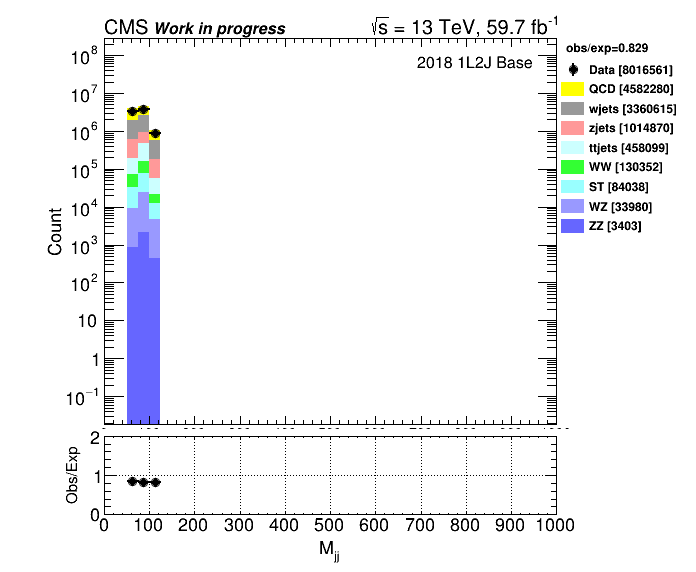

In [16]:
canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(Region_A,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas.Draw()

print("Region A")

Region B


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijetmass_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


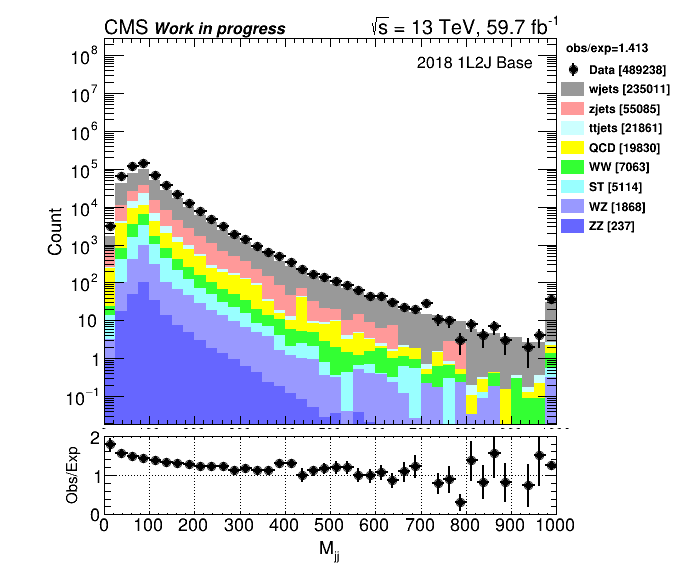

In [17]:
canvas1,stack,legend1,ratioHisto1,ratioleg1=pset.PlotMaker(Region_B,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas1.Draw()

print("Region B")


Region C


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijetmass_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


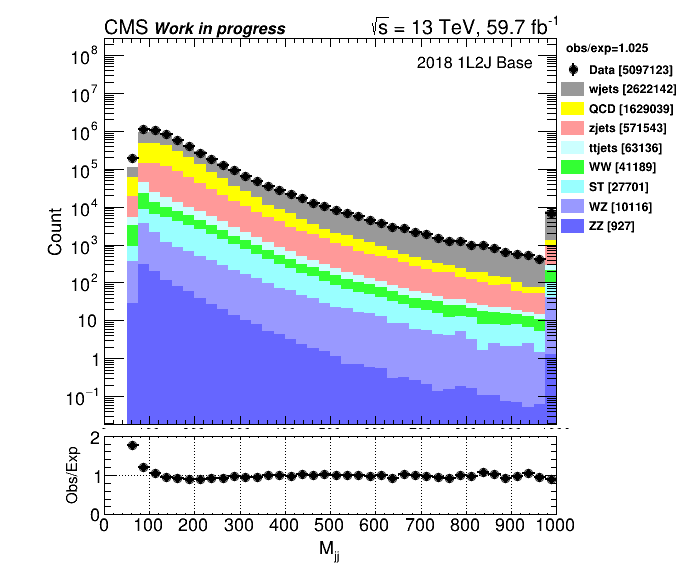

In [18]:
canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(Region_C,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas.Draw()

print("Region C")

Region D


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijetmass_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


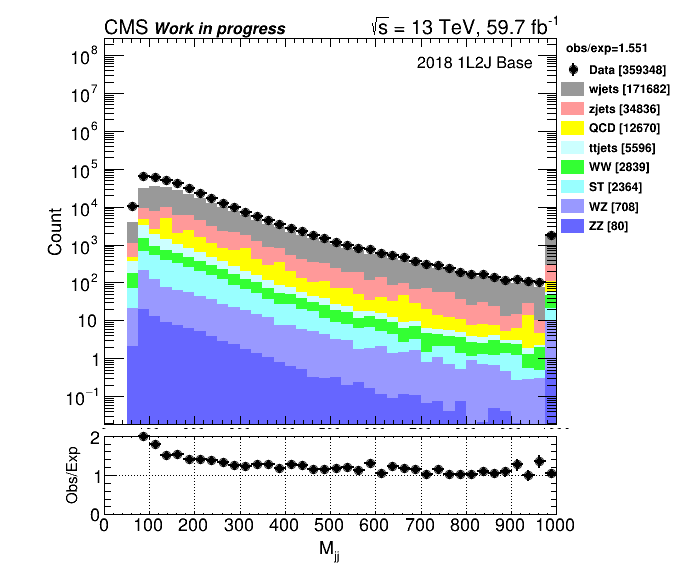

In [19]:
canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(Region_D,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas.Draw()

print("Region D")

 Predict Wjet yield from Data but shape from MC

In [20]:
 def CalculateWjetYield(Dict):
    totOtherBkg=0
    for index,(histkey,hist) in enumerate(Dict.items()):
        #print(histkey,hist)    
        events=hist[1]
        
        if(histkey != 'SingleMuon' and histkey != 'HTbinnedWJets'):
            totOtherBkg+=events
    return totOtherBkg

In [21]:
RegionBundle=[Region_A,Region_B,Region_C,Region_D]
WjetYield=[]

In [22]:
 for ireg,reg in enumerate(RegionBundle):
    othbkg=CalculateWjetYield(reg)
    dataevent= reg['SingleMuon'][1]    
    print("otherbkg =",othbkg)
    print("data     =",dataevent)
    wjetyield= dataevent-othbkg
    
    WjetYield.append(wjetyield)

otherbkg = 6307026.021000001
data     = 8016561.0
otherbkg = 111062.11399999999
data     = 489221.0
otherbkg = 2343653.682
data     = 5093895.0
otherbkg = 59097.535
data     = 358516.0


In [23]:
WjetYield

[1709534.9789999994, 378158.886, 2750241.318, 299418.46499999997]

In [93]:
def getStatTable(histodict,NAME):
    bkgstat=[]
    bkgname=[]
    bkgstat.append(NAME)
    for bkg in bkgbundle:
        if(bkg!='HTbinnedWJets'):
            bkgstat.append(int(histodict[bkg][1]))
            bkgname.append(histodict[bkg][0])
    n_wjets=histodict['SingleMuon'][1]-CalculateWjetYield(histodict)
    #print(n_wjets)
    #print(histodict['SingleMuon'][1])
    purity=(n_wjets/histodict['SingleMuon'][1])
    #print(purity)
    bkgstat.append(int(n_wjets))
    bkgstat.append(purity)
    #print(bkgname)
    #print(bkgstat)
    return bkgstat

info=[]

reglabel=["CR-B","CR-C","CR-D"]
for ireg,region in enumerate([Region_B, Region_C,Region_D]):
    info.append(getStatTable(region,reglabel[ireg]))

    
from tabulate import tabulate    
colname=['Reg','QCD', 'ST', 'ttjets', 'zjets', 'WW', 'WZ', 'ZZ', 'data','wjets','Purity']
print(tabulate(info,headers=colname,floatfmt=".2f",tablefmt='github'))                             

| Reg   |     QCD |    ST |   ttjets |   zjets |    WW |    WZ |   ZZ |    data |   wjets |   Purity |
|-------|---------|-------|----------|---------|-------|-------|------|---------|---------|----------|
| CR-B  |   19830 |  5114 |    21861 |   55085 |  7063 |  1868 |  237 |  489221 |  378158 |     0.77 |
| CR-C  | 1629039 | 27701 |    63136 |  571543 | 41189 | 10116 |  927 | 5093895 | 2750241 |     0.54 |
| CR-D  |   12670 |  2364 |     5596 |   34836 |  2839 |   708 |   80 |  358516 |  299418 |     0.84 |


In [24]:
#ratio_AB = WjetYield[0]/WjetYield[1]
#ratio_CD = WjetYield[2]/WjetYield[3]

#print("Using wjets Data-otherbkg yield\n================================")
#print("A/B = ",ratio_AB)
#print("C/D = ",ratio_CD)

#print("closure = ",ratio_AB/ratio_CD)

In [25]:
TransferFactor=WjetYield[2]/WjetYield[3]     ## 2 == Region C, 3== Region D ## Array starts at 0
print('Transfer factor=',TransferFactor)     ## 0 == Region A, 1== Region B 
print("   ")

Transfer factor= 9.185276258763801
   


In [26]:
print('Predicted wjet yield in Signal Region A =',TransferFactor*WjetYield[1])
print("   ")
print('wjet yield from Wjet MC in Signal Region A = ', Region_A['HTbinnedWJets'][1])

YieldPredictedByABCD=TransferFactor*WjetYield[1]
YieldByWjetMC = Region_A['HTbinnedWJets'][1]

ABCDScalingFactor= "{:.3f}".format((YieldPredictedByABCD) / (YieldByWjetMC))
print("   ")
print('Correction Factor taken from ABCD method=', ABCDScalingFactor)

Predicted wjet yield in Signal Region A = 3473493.837616367
   
wjet yield from Wjet MC in Signal Region A =  3360615.328
   
Correction Factor taken from ABCD method= 1.034


In [27]:
import copy
#Scale the corresponding wjet histogram in Region A

Region_A_PostABCD=copy.deepcopy(Region_A)

Region_A_PostABCD['HTbinnedWJets'][-1].Scale(float(ABCDScalingFactor))

In [28]:
##CheckPoint
#print("    ")
print("        Summary")
print("____________________________________")
print("    ")
print('Wjets events Before ABCD=',pset.Count(Region_A['HTbinnedWJets'][-1]))
print("   ")
print('Wjets events After ABCD=',pset.Count(Region_A_PostABCD['HTbinnedWJets'][-1]))
print("    ")
print('So we take wjet histogram shape from MC but scale the yield predicted by ABCD method')

        Summary
____________________________________
    
Wjets events Before ABCD= 3360615.328
   
Wjets events After ABCD= 3474876.258
    
So we take wjet histogram shape from MC but scale the yield predicted by ABCD method


In [29]:
Region_A_PostABCD = pset.SortDict(Region_A_PostABCD,True)

In [30]:
Region_A_PostABCD

{'SingleMuon': ['data', 8016561.0, 1, <cppyy.gbl.TH1F object at 0x9b3d660>],
 'QCD_MuEnriched': ['QCD',
  4582280.402,
  400,
 'HTbinnedWJets': ['wjets',
  3360615.328,
  921,
 'DYJetsToLL': ['zjets',
  1014870.838,
  623,
 'TTBar': ['ttjets', 458099.856, 422, <cppyy.gbl.TH1F object at 0x9b98f20>],
 'WW': ['WW', 130352.732, 412, <cppyy.gbl.TH1F object at 0x9921850>],
 'SingleTop': ['ST', 84038.336, 423, <cppyy.gbl.TH1F object at 0x99b73e0>],
 'WZ': ['WZ', 33980.44, 591, <cppyy.gbl.TH1F object at 0x9b3dcd0>],
 'ZZ': ['ZZ', 3403.417, 593, <cppyy.gbl.TH1F object at 0x9ade730>]}

### Dijet Mass plot before ABCD

************
Region A
************


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijetmass_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


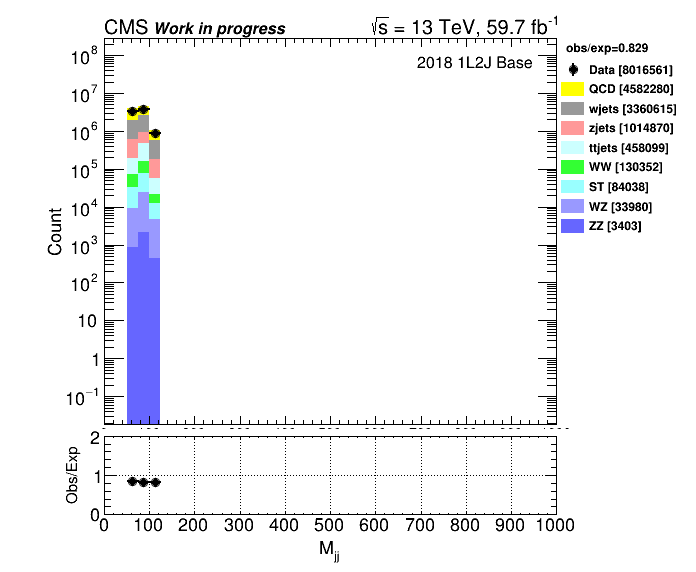

In [31]:
canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(Region_A,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas.Draw();

print("************")
print("Region A");
print("************")

### Dijet Mass plot after ABCD

************
Region A after ABCD
************


Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijetmass_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/dijetmass_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/dijetmass_l2j_regA;1.eps has been created


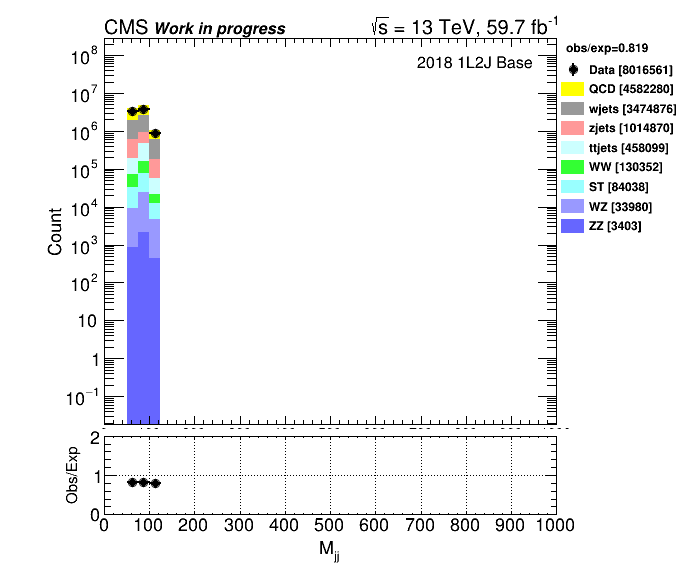

In [32]:
canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(Region_A_PostABCD,"dijetmass_l2j_regA;1","M_{jj}",25,False,"","")
canvas.Draw();

print("************")
print("Region A after ABCD");
print("************")

Plot Some other Variable using the transfer factor measured here

In [33]:
def plotmakerPostABCD(region,var,Xaxislabel,binwidth):
    HistoDict=GetRegionHistoDictSorted(region,var)
    
    #YieldPredictedByABCD=TransferFactor*WjetYield[1]
    YieldByWjetMC = HistoDict['HTbinnedWJets'][1]
    print('WJet yield using MC =',YieldByWjetMC)
    print('Correction Factor taken from ABCD method=', ABCDScalingFactor)
    print('\nscaling wjet histogram....\n')
    
    HistoDict_PostABCD = copy.deepcopy(HistoDict)
    HistoDict_PostABCD['HTbinnedWJets'][-1].Scale(float(ABCDScalingFactor))    
    print('\nscaling done....\n\nAfter scaling, wjets yield predicted by ABCD method=',HistoDict_PostABCD['HTbinnedWJets'][1])
    
    pname = var+"_l2j_"+region+";1"
    canvas,stack,legend,ratioHisto,ratioleg=pset.PlotMaker(HistoDict_PostABCD,pname,Xaxislabel,binwidth,False,"","")
    canvas.Draw()
    return canvas,stack,legend,ratioHisto,ratioleg

*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************


(<cppyy.gbl.TCanvas object at 0x8c89e30>,
 <cppyy.gbl.TLegend object at 0x99b81c0>)

Info in <TCanvas::Print>: pdf file Plots/mtjet0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/mtjet0_l2j_regA;1.eps has been created


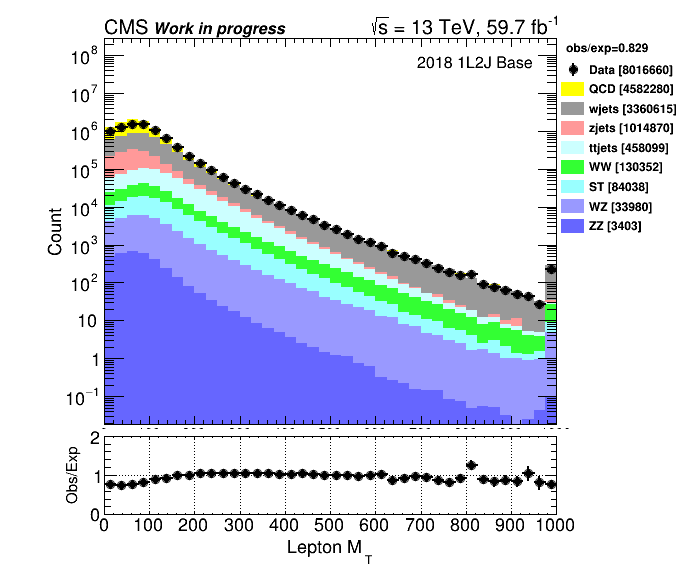

In [34]:
plotmaker('regA','mtjet0','Lepton M_{T}',25)

*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
WJet yield using MC = 3360615.333
Correction Factor taken from ABCD method= 1.034

scaling wjet histogram....


scaling done....

After scaling, wjets yield predicted by ABCD method= 3360615.333


(<cppyy.gbl.TCanvas object at 0x95994e0>,
 <cppyy.gbl.TLegend object at 0x99541e0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mtjet0_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/mtjet0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/mtjet0_l2j_regA;1.eps has been created


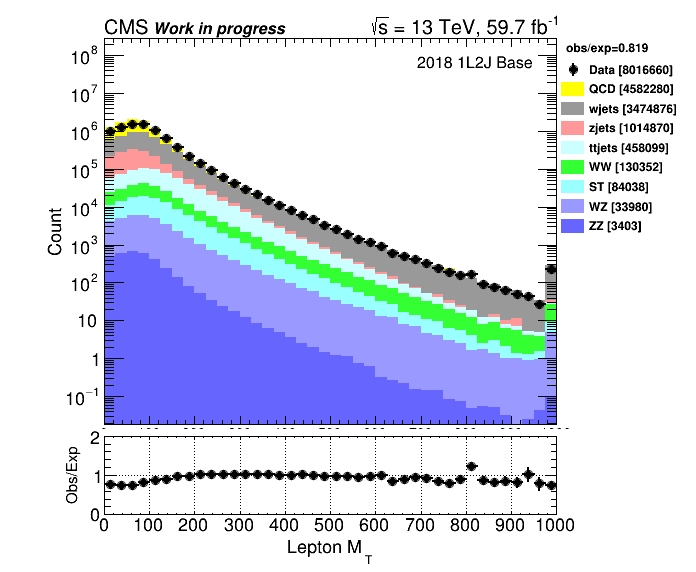

In [35]:
plotmakerPostABCD('regA','mtjet0','Lepton M_{T}',25)

In [36]:
VariableName=["ptlep0","ptjet0","ptjet1","mtlep0","mtjet0","mtjet1","dijetmass","drjet01",
                  "dijetPT","dijetMT","MET","HT","ST","njet","nbjet","dphimetjet0","dphimetjet1",
                  "dphimetlep0","dphijet0lep0","dphijet1lep0","dphidijetlep0","dphimetdijet"]

LabelName=["Lepton PT","Leading jet Pt","SubLeading jet pt","Lepton MT","Leading Jet MT",
               "Subleading Jet MT","Dijet Inv Mass","deltaR(jet0,jet1)","Dijet System Inv Mass",
               "Dijet System MT","MET","HT","ST","No of jets","No of b-jets","dphi(met,leading jet)",
               "dphi(met,subleading jet)","dphi(met,lepton)","dphi(jet0,lepton)","dphi(jet1,lepton)",
               "dphi(dijet system,lepton)","dphi(dijet system,met)"]

binning=[20,20,20,25,25,25,25,5,25,25,25,25,25,1,1,5,5,5,5,5,5,5]

In [37]:
#for ivar,var in enumerate(VariableName):
#    plotmakerPostABCD('regA',var,LabelName[ivar]+'_PostABCD',binning[ivar])

*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
WJet yield using MC = 3360615.32
Correction Factor taken from ABCD method= 1.034

scaling wjet histogram....


scaling done....

After scaling, wjets yield predicted by ABCD method= 3360615.32
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
WJet yield using MC = 3360615.331
Correction Factor taken from ABCD method= 1.034

scaling wjet histogram....


scaling done....

After scaling, wjets yield predicted by ABCD method= 3360615.331
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
WJet yield using MC = 3360615.338
Correction Factor taken from ABCD method= 1.034

scaling wjet histogram....


scaling done....

After scaling, wjets yield predicted by ABCD method= 3360615.338
*******YOU ARE RUNNING ON UNSKIMMED FULL SAMPLES************
WJet yield using MC = 3360615.329
Correction Factor taken from ABCD method= 1.034

scaling wjet histogram....


scaling done....

After scaling, wjets yield predicted by ABC

Info in <TCanvas::Print>: pdf file Plots/ptlep0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/ptlep0_l2j_regA;1.eps has been created
Info in <TCanvas::Print>: pdf file Plots/ptjet0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/ptjet0_l2j_regA;1.eps has been created
Info in <TCanvas::Print>: pdf file Plots/ptjet1_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/ptjet1_l2j_regA;1.eps has been created
Info in <TCanvas::Print>: pdf file Plots/mtlep0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/mtlep0_l2j_regA;1.eps has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: mtjet0_l2j_regA;1
Info in <TCanvas::Print>: pdf file Plots/mtjet0_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file Plots/mtjet0_l2j_regA;1.eps has been created
Info in <TCanvas::Print>: pdf file Plots/mtjet1_l2j_regA;1.pdf has been created
Info in <TCanvas::Print>: eps file 